In [1]:
import torch
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    BertForMaskedLM, GPT2LMHeadModel, GPT2TokenizerFast
)

In [2]:
clf_name = "textattack/bert-base-uncased-imdb"  
cache_dir = "/ssd_scratch/sweta.jena/new" 
clf_tokenizer = AutoTokenizer.from_pretrained(clf_name, cache_dir = cache_dir)

In [3]:
dataset_name="imdb"
batch_size=64
max_len=512

dataset = load_dataset(dataset_name)
test_data = dataset["test"]
examples=list(test_data)

texts = []
for i in range(0, len(examples), batch_size):

    # last run till- 2496
    if i> 2624:
        break

    batch = examples[i:i+batch_size]
    
    for ex in batch:
        enc = clf_tokenizer(
            ex["text"],
            truncation=True,
            padding=False,
            max_length=max_len,
            return_tensors="pt"
        )
        truncated_text = clf_tokenizer.decode(enc["input_ids"][0], skip_special_tokens=True)
        texts.append(truncated_text)

In [4]:
2624+64

2688

In [5]:
len(texts)

2688

In [6]:
df_og = pd.DataFrame({'original_text':texts})
df_og

,original_text
0,i love sci - fi and am willing to put up with ...
1,"worth the entertainment value of a rental, esp..."
2,its a totally average film with a few semi - a...
3,star rating : * * * * * saturday night * * * *...
4,"first off let me say, if you haven't enjoyed a..."
...,...
2683,"okay, some other people have commented that th..."
2684,steven seagal played in many action movies. mo...
2685,seems sensei seagal is getting more and more m...
2686,i remember when this came out it was the first...


In [7]:
df1 = pd.read_csv('/ssd_scratch/sweta.jena/intermediate_counterfactuals_2624_shap_lime.csv')
df1['approach'] = 'single_tok'
df1

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced,approach
0,1,SHAP,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('.', 'but')",0.970543,68.212875,0.054393,"[0.013422138057649136, -0.053415268659591675, ...","[0.019398581236600876, -0.06572108715772629, -...",0.000228,single_tok
1,1,SHAP,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('.', 'and')",0.978007,73.863121,0.054393,"[0.013422138057649136, -0.053415268659591675, ...","[0.015377185307443142, -0.07203003764152527, 0...",0.000228,single_tok
2,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'is')",0.996635,58.650864,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.05127648636698723, 0.023942530155181885, -...",0.000055,single_tok
3,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'was')",0.999207,59.027668,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.04922273010015488, 0.028409594669938087, -...",0.000055,single_tok
4,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'bit')",0.999036,62.394833,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.048258453607559204, 0.030498158186674118, ...",0.000055,single_tok
...,...,...,...,...,...,...,...,...,...,...,...,...
8367,1,LIME,i remember when this came out it was the first...,i remember when this came out it was the first...,"('making', 'productions')",0.999149,62.520782,0.016000,"[-0.0659291073679924, 0.058485761284828186, -0...","[-0.06473546475172043, 0.056748636066913605, -...",0.000128,single_tok
8368,1,LIME,i remember when this came out it was the first...,i remember when this came out it was our first...,"('the', 'our')",0.970937,97.751160,0.088000,"[-0.0659291073679924, 0.058485761284828186, -0...","[-0.05717964470386505, 0.055717770010232925, -...",0.000704,single_tok
8369,1,LIME,i remember when this came out it was the first...,i remember when this came out it was we first ...,"('the', 'we')",0.958339,106.980392,0.088000,"[-0.0659291073679924, 0.058485761284828186, -0...","[-0.06139581277966499, 0.0398518331348896, -0....",0.000704,single_tok
8370,1,LIME,i remember when this came out it was the first...,i remember when this came out it was the first...,"('although', 'whilst')",0.999603,56.329857,0.008000,"[-0.0659291073679924, 0.058485761284828186, -0...","[-0.06542982906103134, 0.05945630371570587, -0...",0.000064,single_tok


In [8]:

df2 = pd.concat([pd.read_csv('/ssd_scratch/sweta.jena/new/intermediate_counterfactuals_2624_shap_lime.csv'),
                 pd.read_csv('/ssd_scratch/sweta.jena/new/intermediate_counterfactuals_2496_shap_lime.csv') #run1 till here
                 ], axis=0, ignore_index=True).reset_index(drop=True)
df2['approach'] = 'single_tok_steer'
df2

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced,approach
0,1,SHAP,after loomis gives a quick recap of micheal my...,after loomis gives a quick recap of micheal my...,"('stupid', 'interesting')",0.998918,67.091415,0.004854,"[-0.09981048107147217, -0.018377229571342468, ...","[-0.1050158143043518, -0.018960200250148773, 0...",0.000024,single_tok_steer
1,1,SHAP,after loomis gives a quick recap of micheal my...,after loomis gives a quick recap of micheal my...,"('stupid', 'funny')",0.998824,68.122124,0.004854,"[-0.09981048107147217, -0.018377229571342468, ...","[-0.10260274261236191, -0.020472215488553047, ...",0.000024,single_tok_steer
2,1,SHAP,after loomis gives a quick recap of micheal my...,after loomis gives a quick recap of micheal my...,"('stupid', 'weird')",0.999440,68.603233,0.004854,"[-0.09981048107147217, -0.018377229571342468, ...","[-0.10102468729019165, -0.01957760564982891, 0...",0.000024,single_tok_steer
3,1,SHAP,after loomis gives a quick recap of micheal my...,after loomis gives a quick recap of micheal my...,"('stupid', 'good')",0.998921,67.304306,0.004854,"[-0.09981048107147217, -0.018377229571342468, ...","[-0.10334329307079315, -0.01969207637012005, 0...",0.000024,single_tok_steer
4,1,SHAP,"most of this film was okay, for a sequel of a ...","most of this film was okay, for a sequel of a ...","('.', ')')",0.992709,34.146900,0.036000,"[-0.0746644139289856, 0.045542459934949875, -0...","[-0.08703545480966568, 0.04637924209237099, -0...",0.000144,single_tok_steer
...,...,...,...,...,...,...,...,...,...,...,...,...
7791,1,LIME,this movie plays out like an english version o...,this movie plays out like an english version o...,"('if', '-')",0.998395,48.153103,0.012987,"[-0.035443034023046494, 0.02356705628335476, -...","[-0.04083489254117012, 0.01863998733460903, -0...",0.000169,single_tok_steer
7792,1,LIME,this movie plays out like an english version o...,this movie plays out like an english version o...,"('if', ';')",0.998434,50.737709,0.012987,"[-0.035443034023046494, 0.02356705628335476, -...","[-0.03624889254570007, 0.02269313484430313, -0...",0.000169,single_tok_steer
7793,1,LIME,this movie plays out like an english version o...,this movie plays out like an english version o...,"('if', ',')",0.997545,51.026394,0.012987,"[-0.035443034023046494, 0.02356705628335476, -...","[-0.03390909358859062, 0.021333586424589157, -...",0.000169,single_tok_steer
7794,1,LIME,this movie plays out like an english version o...,this movie plays out like an english version o...,"('if', '...')",0.990806,50.912319,0.012987,"[-0.035443034023046494, 0.02356705628335476, -...","[-0.046267371624708176, 0.008744251914322376, ...",0.000169,single_tok_steer


In [9]:
df3=pd.read_csv('latest_intermediate_results_mt_at.csv')
df3 = df3[df3['edit_type']!='single-token'].reset_index(drop=True)
df3['method'] = df3['method'].map(lambda x: x.split('-')[0].strip())
df3['approach'] = 'multi_tok'
df3

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced,edit_type,approach
0,1,SHAP,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('.->...', 'not->very')",0.938516,58.596718,0.104603,"[0.013422119431197643, -0.05341522768139839, 0...","[0.00359835266135633, -0.054686449468135834, 0...",0.000438,multi-token (2),multi_tok
1,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('little->lot', 'not->is')",0.995233,65.385200,0.022222,"[-0.04979102686047554, 0.030777275562286377, -...","[-0.05124744772911072, 0.021253619343042374, -...",0.000165,multi-token (2),multi_tok
2,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('little->lot', 'not->was')",0.998452,65.880905,0.022222,"[-0.04979102686047554, 0.030777275562286377, -...","[-0.04903329163789749, 0.02633688971400261, -0...",0.000165,multi-token (2),multi_tok
3,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('little->little', 'not->is')",0.996635,58.650810,0.007407,"[-0.04979102686047554, 0.030777275562286377, -...","[-0.05127647519111633, 0.02394253946840763, -0...",0.000055,multi-token (2),multi_tok
4,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('little->little', 'not->was')",0.999207,59.027637,0.007407,"[-0.04979102686047554, 0.030777275562286377, -...","[-0.049222689121961594, 0.028409535065293312, ...",0.000055,multi-token (2),multi_tok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,0,SHAP,i heard the stories of the ravers in the movie...,i hetherd the stories of the rthevers in the m...,"('a->the', 'candidate->plot')",0.589401,176.006302,0.302752,"[-0.12516529858112335, -0.025722460821270943, ...","[-0.07770299166440964, 0.004371803719550371, 0...",0.001389,multi-token (2),multi_tok
3367,0,SHAP,i heard the stories of the ravers in the movie...,i hetherd the stories of the rthevers in the m...,"('a->the', 'candidate->sequel')",0.589401,176.006302,0.302752,"[-0.12516529858112335, -0.025722460821270943, ...","[-0.07770299166440964, 0.004371803719550371, 0...",0.001389,multi-token (2),multi_tok
3368,0,SHAP,i heard the stories of the ravers in the movie...,i hetherd the stories of the rthevers in the m...,"('a->the', 'candidate->twist')",0.589401,176.006302,0.302752,"[-0.12516529858112335, -0.025722460821270943, ...","[-0.07770299166440964, 0.004371803719550371, 0...",0.001389,multi-token (2),multi_tok
3369,0,SHAP,i heard the stories of the ravers in the movie...,i hethisrd the stories of the rthisvers in the...,"('a->this', 'candidate->plot')",0.597050,202.027145,0.302752,"[-0.12516529858112335, -0.025722460821270943, ...","[-0.07087264209985733, -0.00815543718636036, 0...",0.001389,multi-token (2),multi_tok


In [10]:
df1= df1.groupby(['approach','method','original_text'], as_index=False).agg({'perplexity':'min', 'edit_distance':'min','success':'sum','semantic_similarity':'max'})
df1

,approach,method,original_text,perplexity,edit_distance,success,semantic_similarity
0,single_tok,LIME,""" death wish 3 "" is the movie equivalent of a ...",83.255173,0.008621,2,0.991819
1,single_tok,LIME,""" dolemite "" is the touching story of dolemite...",34.385841,0.002421,24,1.000000
2,single_tok,LIME,""" hoods "" doesn't deliver the goods. this half...",44.736389,0.002381,1,0.998558
3,single_tok,LIME,""" may contain spoilers "" sadly lou costellos'l...",78.929657,0.007042,24,0.999940
4,single_tok,LIME,""" people stranded in a country house during a ...",64.148308,0.004831,20,0.999850
...,...,...,...,...,...,...,...
1193,single_tok,SHAP,ya know what? family guy started out as someth...,49.855923,0.007692,5,0.999462
1194,single_tok,SHAP,"you may like tim burton's fantasies, but not i...",408.526581,0.032258,0,0.994387
1195,single_tok,SHAP,you should never ever even consider to watch t...,27.059980,0.006993,2,0.983144
1196,single_tok,SHAP,you'd hardly know that a year later mgm put no...,157.232468,0.380282,0,0.527655


In [11]:
df2= df2.groupby(['approach','method','original_text'], as_index=False).agg({'perplexity':'min', 'edit_distance':'min','success':'sum','semantic_similarity':'max'})
df2

,approach,method,original_text,perplexity,edit_distance,success,semantic_similarity
0,single_tok_steer,LIME,""" atoll k "" aka "" utopia "" is one of hollywood...",48.366207,0.008403,1,0.986613
1,single_tok_steer,LIME,""" dolemite "" is the touching story of dolemite...",33.757236,0.002421,10,1.000000
2,single_tok_steer,LIME,""" may contain spoilers "" sadly lou costellos'l...",78.929657,0.007042,17,0.998796
3,single_tok_steer,LIME,""" people stranded in a country house during a ...",65.428459,0.004831,18,0.999646
4,single_tok_steer,LIME,""" riders of destiny "" was the first of several...",68.002953,0.003333,7,1.000000
...,...,...,...,...,...,...,...
1071,single_tok_steer,SHAP,ya know what? family guy started out as someth...,49.855923,0.007692,5,0.999462
1072,single_tok_steer,SHAP,"yeah it may not be for adults, and some adults...",18.525541,0.017544,8,0.993893
1073,single_tok_steer,SHAP,"you may like tim burton's fantasies, but not i...",408.526581,0.032258,0,0.995616
1074,single_tok_steer,SHAP,you'd hardly know that a year later mgm put no...,157.232468,0.380282,0,0.527655


In [12]:
df3= df3.groupby(['approach','method','original_text'], as_index=False).agg({'perplexity':'min', 'edit_distance':'min','success':'sum','semantic_similarity':'max'})
df3

,approach,method,original_text,perplexity,edit_distance,success,semantic_similarity
0,multi_tok,LIME,""" witchery "" might just be the most incoherent...",82.786896,0.003311,17,0.992849
1,multi_tok,LIME,"' bloody birthday'is an odd and, at times, hum...",39.645992,0.003425,9,0.999375
2,multi_tok,LIME,< br / > < br / > never ever take a film just ...,27.342789,0.009615,37,0.998203
3,multi_tok,LIME,"a mean spirited, repulsive horror film about 3...",104.533935,0.040000,5,0.972347
4,multi_tok,LIME,a rather lame teen slasher from brisbane. whil...,55.647747,0.021583,9,0.989106
...,...,...,...,...,...,...,...
181,multi_tok,SHAP,when you make a film with a killer - kids prem...,45.812515,0.011628,6,0.989570
182,multi_tok,SHAP,widow hires a psychopath as a handyman. sloppy...,221.169540,0.037037,0,0.992797
183,multi_tok,SHAP,"worth the entertainment value of a rental, esp...",58.596718,0.104603,1,0.938516
184,multi_tok,SHAP,"wow, another kevin costner hero movie. postman...",46.265659,0.005988,34,0.998257


In [13]:
df1.columns

Index(['approach', 'method', 'original_text', 'perplexity', 'edit_distance',
       'success', 'semantic_similarity'],
      dtype='object')

In [14]:
df1_lime= pd.merge(left=df_og, right=df1[df1['method']=='LIME'], on='original_text', how='left')
#na means the label wasnt flipped so it wasnt added to the df1 results csv (as it's not a counterfactual)
df1_lime['flip'] = 1-df1_lime['approach'].isna()
df1_lime['flip'].value_counts(normalize=True) *100

flip
0    76.488095
1    23.511905
Name: proportion, dtype: float64

In [15]:
df1_shap= pd.merge(left=df_og, right=df1[df1['method']=='SHAP'], on='original_text', how='left')
df1_shap['flip'] = 1-df1_shap['approach'].isna()
df1_shap['flip'].value_counts(normalize=True)  *100

flip
0    78.943452
1    21.056548
Name: proportion, dtype: float64

In [16]:
df2_lime= pd.merge(left=df_og, right=df2[df2['method']=='LIME'], on='original_text', how='left')
df2_lime['flip'] = 1-df2_lime['approach'].isna()
df2_lime['flip'].value_counts(normalize=True)  *100

flip
0    79.017857
1    20.982143
Name: proportion, dtype: float64

In [17]:
df2_shap= pd.merge(left=df_og, right=df2[df2['method']=='SHAP'], on='original_text', how='left')
df2_shap['flip'] = 1-df2_shap['approach'].isna()
df2_shap['flip'].value_counts(normalize=True)  *100

flip
0    80.952381
1    19.047619
Name: proportion, dtype: float64

In [18]:
df3_lime= pd.merge(left=df_og[:832+64], right=df3[df3['method']=='LIME'], on='original_text', how='left') # latest run till i=832
df3_lime['flip'] = 1-df3_lime['approach'].isna()
df3_lime['flip'].value_counts(normalize=True)  *100

flip
0    88.727679
1    11.272321
Name: proportion, dtype: float64

In [19]:
df3_shap= pd.merge(left=df_og[:832+64], right=df3[df3['method']=='SHAP'], on='original_text', how='left')
df3_shap['flip'] = 1-df3_shap['approach'].isna()
df3_shap['flip'].value_counts(normalize=True)  *100

flip
0    90.513393
1     9.486607
Name: proportion, dtype: float64

In [20]:
df1_shap.columns

Index(['original_text', 'approach', 'method', 'perplexity', 'edit_distance',
       'success', 'semantic_similarity', 'flip'],
      dtype='object')

Success rates

In [21]:
#if (cf.get("semantic_similarity") >= sim_threshold) and (cf.get("perplexity") <= ppl_threshold)

In [22]:
df = df1_shap
df[(df['flip']==1)]['success'].mean()

6.169611307420495

In [23]:
df = df1_lime
df[(df['flip']==1)]['success'].mean()

6.447784810126582

In [24]:
df = df2_shap
df[(df['flip']==1)]['success'].mean()

6.306640625

In [25]:
df = df2_lime
df[(df['flip']==1)]['success'].mean()

6.601063829787234

In [26]:
df = df3_shap
df[(df['flip']==1)]['success'].mean()

13.988235294117647

In [27]:
df = df3_lime
df[(df['flip']==1)]['success'].mean()

16.554455445544555

In [39]:
dfs = {
    "single_shap": df1_shap,
    "single_lime": df1_lime,
    "steered_single_shap": df2_shap,
    "steered_single_lime": df2_lime,
    "multi_shap": df3_shap,
    "multi_lime": df3_lime
}


perp_series = {
    name: df[(df["success"]==1) & (df["flip"]==1)]["perplexity"]
    for name, df in dfs.items()
}

summary = pd.concat(perp_series, axis=1).describe()
summary.to_csv('perplexity_summ.csv')
summary


,single_shap,single_lime,steered_single_shap,steered_single_lime,multi_shap,multi_lime
count,108.000000,135.000000,91.000000,109.000000,10.000000,6.000000
mean,66.978787,62.449335,63.670882,61.062513,80.917445,57.389253
std,34.093343,29.342724,30.268283,28.631927,47.027511,16.708385
min,20.384222,20.384222,1.754227,20.384222,38.716770,34.536148
25%,44.019632,41.641468,42.201048,41.942165,55.837135,49.062063
50%,58.175585,57.629642,59.160751,53.769833,67.783527,57.198093
75%,80.651068,77.707745,73.664814,70.199677,90.144905,63.086676
max,187.313080,163.319504,194.236938,188.950516,199.757172,84.003593


In [40]:
summary.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & single_shap & single_lime & steered_single_shap & steered_single_lime & multi_shap & multi_lime \\\\\n\\midrule\ncount & 108.000000 & 135.000000 & 91.000000 & 109.000000 & 10.000000 & 6.000000 \\\\\nmean & 66.978787 & 62.449335 & 63.670882 & 61.062513 & 80.917445 & 57.389253 \\\\\nstd & 34.093343 & 29.342724 & 30.268283 & 28.631927 & 47.027511 & 16.708385 \\\\\nmin & 20.384222 & 20.384222 & 1.754227 & 20.384222 & 38.716770 & 34.536148 \\\\\n25% & 44.019632 & 41.641468 & 42.201048 & 41.942165 & 55.837135 & 49.062063 \\\\\n50% & 58.175585 & 57.629642 & 59.160751 & 53.769833 & 67.783527 & 57.198093 \\\\\n75% & 80.651068 & 77.707745 & 73.664814 & 70.199677 & 90.144905 & 63.086676 \\\\\nmax & 187.313080 & 163.319504 & 194.236938 & 188.950516 & 199.757172 & 84.003593 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [41]:
dfs = {
    "single_shap": df1_shap,
    "single_lime": df1_lime,
    "steered_single_shap": df2_shap,
    "steered_single_lime": df2_lime,
    "multi_shap": df3_shap,
    "multi_lime": df3_lime
}


perp_series = {
    name: df[(df["success"]==1) & (df["flip"]==1)]["edit_distance"]
    for name, df in dfs.items()
}

summary = pd.concat(perp_series, axis=1).describe()
summary.to_csv('edit_distance_summ.csv')
summary


,single_shap,single_lime,steered_single_shap,steered_single_lime,multi_shap,multi_lime
count,108.000000,135.000000,91.000000,109.000000,10.000000,6.000000
mean,0.020324,0.012951,0.025517,0.016581,0.049938,0.013553
std,0.042311,0.013107,0.051077,0.034088,0.026049,0.009092
min,0.002331,0.002257,0.002212,0.002421,0.014085,0.005698
25%,0.006590,0.006024,0.006667,0.005714,0.031935,0.008460
50%,0.008163,0.007692,0.011364,0.007874,0.046013,0.009743
75%,0.020222,0.015873,0.024782,0.016393,0.064113,0.015846
max,0.416342,0.098039,0.416342,0.265403,0.104603,0.030220


In [42]:
summary.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & single_shap & single_lime & steered_single_shap & steered_single_lime & multi_shap & multi_lime \\\\\n\\midrule\ncount & 108.000000 & 135.000000 & 91.000000 & 109.000000 & 10.000000 & 6.000000 \\\\\nmean & 0.020324 & 0.012951 & 0.025517 & 0.016581 & 0.049938 & 0.013553 \\\\\nstd & 0.042311 & 0.013107 & 0.051077 & 0.034088 & 0.026049 & 0.009092 \\\\\nmin & 0.002331 & 0.002257 & 0.002212 & 0.002421 & 0.014085 & 0.005698 \\\\\n25% & 0.006590 & 0.006024 & 0.006667 & 0.005714 & 0.031935 & 0.008460 \\\\\n50% & 0.008163 & 0.007692 & 0.011364 & 0.007874 & 0.046013 & 0.009743 \\\\\n75% & 0.020222 & 0.015873 & 0.024782 & 0.016393 & 0.064113 & 0.015846 \\\\\nmax & 0.416342 & 0.098039 & 0.416342 & 0.265403 & 0.104603 & 0.030220 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [43]:
dfs = {
    "single_shap": df1_shap,
    "single_lime": df1_lime,
    "steered_single_shap": df2_shap,
    "steered_single_lime": df2_lime,
    "multi_shap": df3_shap,
    "multi_lime": df3_lime
}


perp_series = {
    name: df[(df["success"]==1) & (df["flip"]==1)]["semantic_similarity"]
    for name, df in dfs.items()
}

summary = pd.concat(perp_series, axis=1).describe()
summary.to_csv('semantic_similarity_summ.csv')
summary

,single_shap,single_lime,steered_single_shap,steered_single_lime,multi_shap,multi_lime
count,108.000000,135.000000,91.000000,109.000000,10.000000,6.000000
mean,0.977356,0.986079,0.974265,0.981905,0.948228,0.992331
std,0.047273,0.025619,0.047158,0.036358,0.065661,0.005834
min,0.760853,0.864365,0.760853,0.765470,0.835181,0.983805
25%,0.982448,0.988139,0.974395,0.981197,0.891313,0.990209
50%,0.996274,0.996366,0.994245,0.994245,0.991683,0.991086
75%,0.998949,0.998884,0.998764,0.998184,0.995741,0.996805
max,1.000000,1.000000,1.000000,1.000000,0.998866,0.999378


In [44]:
summary.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & single_shap & single_lime & steered_single_shap & steered_single_lime & multi_shap & multi_lime \\\\\n\\midrule\ncount & 108.000000 & 135.000000 & 91.000000 & 109.000000 & 10.000000 & 6.000000 \\\\\nmean & 0.977356 & 0.986079 & 0.974265 & 0.981905 & 0.948228 & 0.992331 \\\\\nstd & 0.047273 & 0.025619 & 0.047158 & 0.036358 & 0.065661 & 0.005834 \\\\\nmin & 0.760853 & 0.864365 & 0.760853 & 0.765470 & 0.835181 & 0.983805 \\\\\n25% & 0.982448 & 0.988139 & 0.974395 & 0.981197 & 0.891313 & 0.990209 \\\\\n50% & 0.996274 & 0.996366 & 0.994245 & 0.994245 & 0.991683 & 0.991086 \\\\\n75% & 0.998949 & 0.998884 & 0.998764 & 0.998184 & 0.995741 & 0.996805 \\\\\nmax & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.998866 & 0.999378 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [31]:
#note - edit_distance is already normalized so we take 'edit_distance' as the true mced (in the code 'mced' = renormalization of 'edit_distance' which was a bug)

In [32]:
def plot_metric_histograms(metric_col, metric_name):
    data_map = {
        "Single token SHAP": df1_shap,
        "Single token LIME": df1_lime,
        "Steered single token SHAP": df2_shap,
        "Steered single token LIME": df2_lime,
        "Multi token SHAP": df3_shap,
        "Multi token LIME": df3_lime
    }

    fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for ax, (title, df) in zip(axes, data_map.items()):
        df_filtered = df[(df["success"]==1) & (df["flip"]==1)]
        ax.hist(df_filtered[metric_col], bins=50)
        ax.set_title(f"{title} - Distribution of {metric_name}", fontsize=9)
        ax.set_xlabel(metric_name)
        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


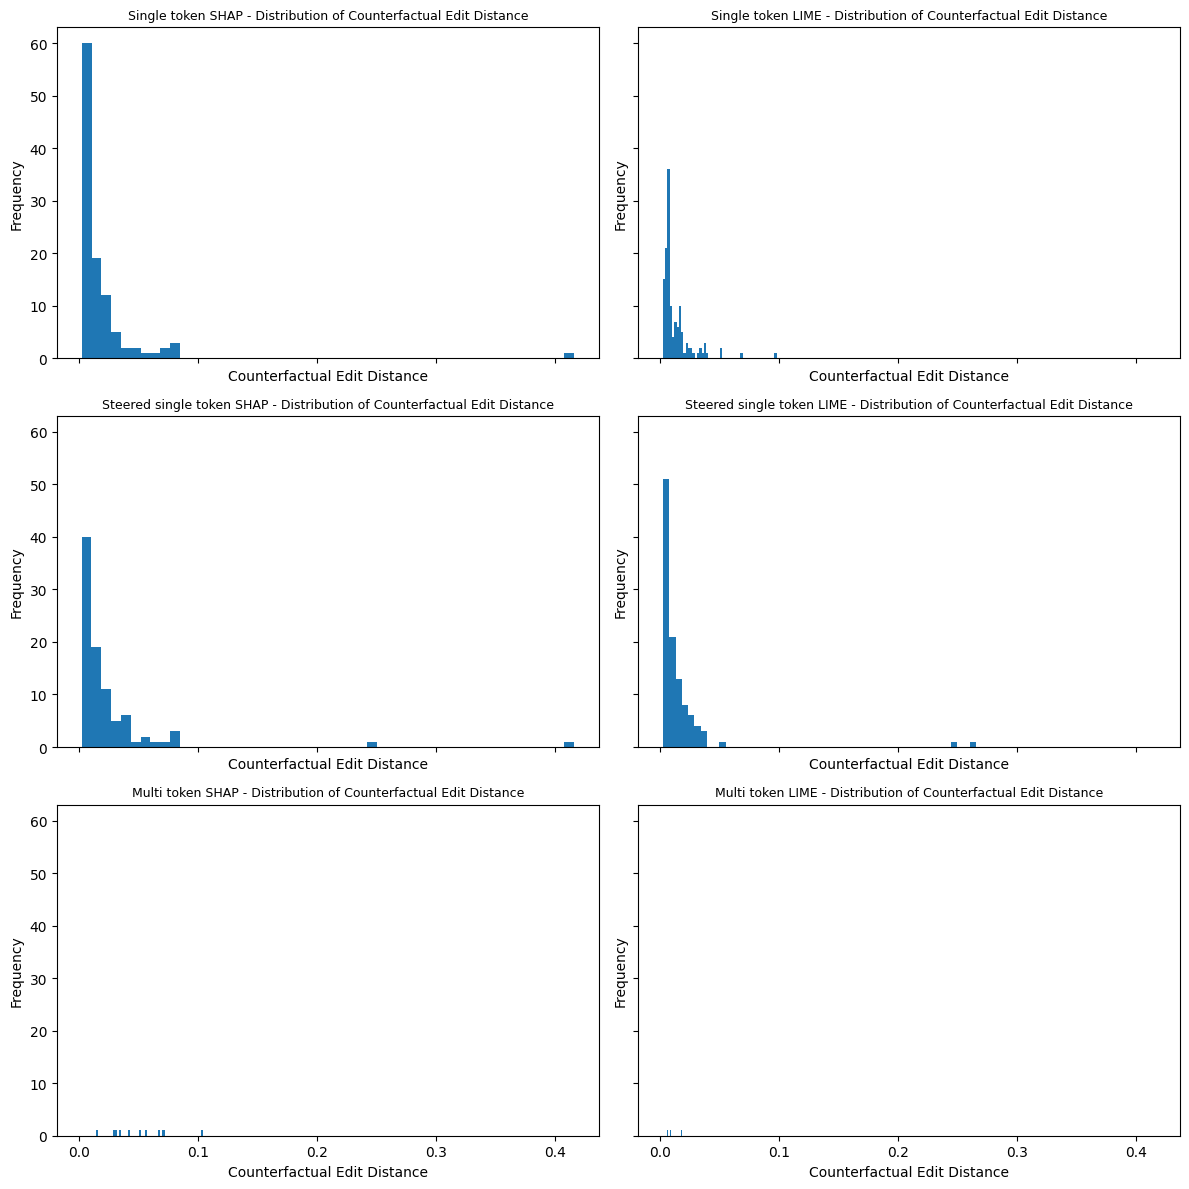

In [33]:
plot_metric_histograms("edit_distance", "Counterfactual Edit Distance")

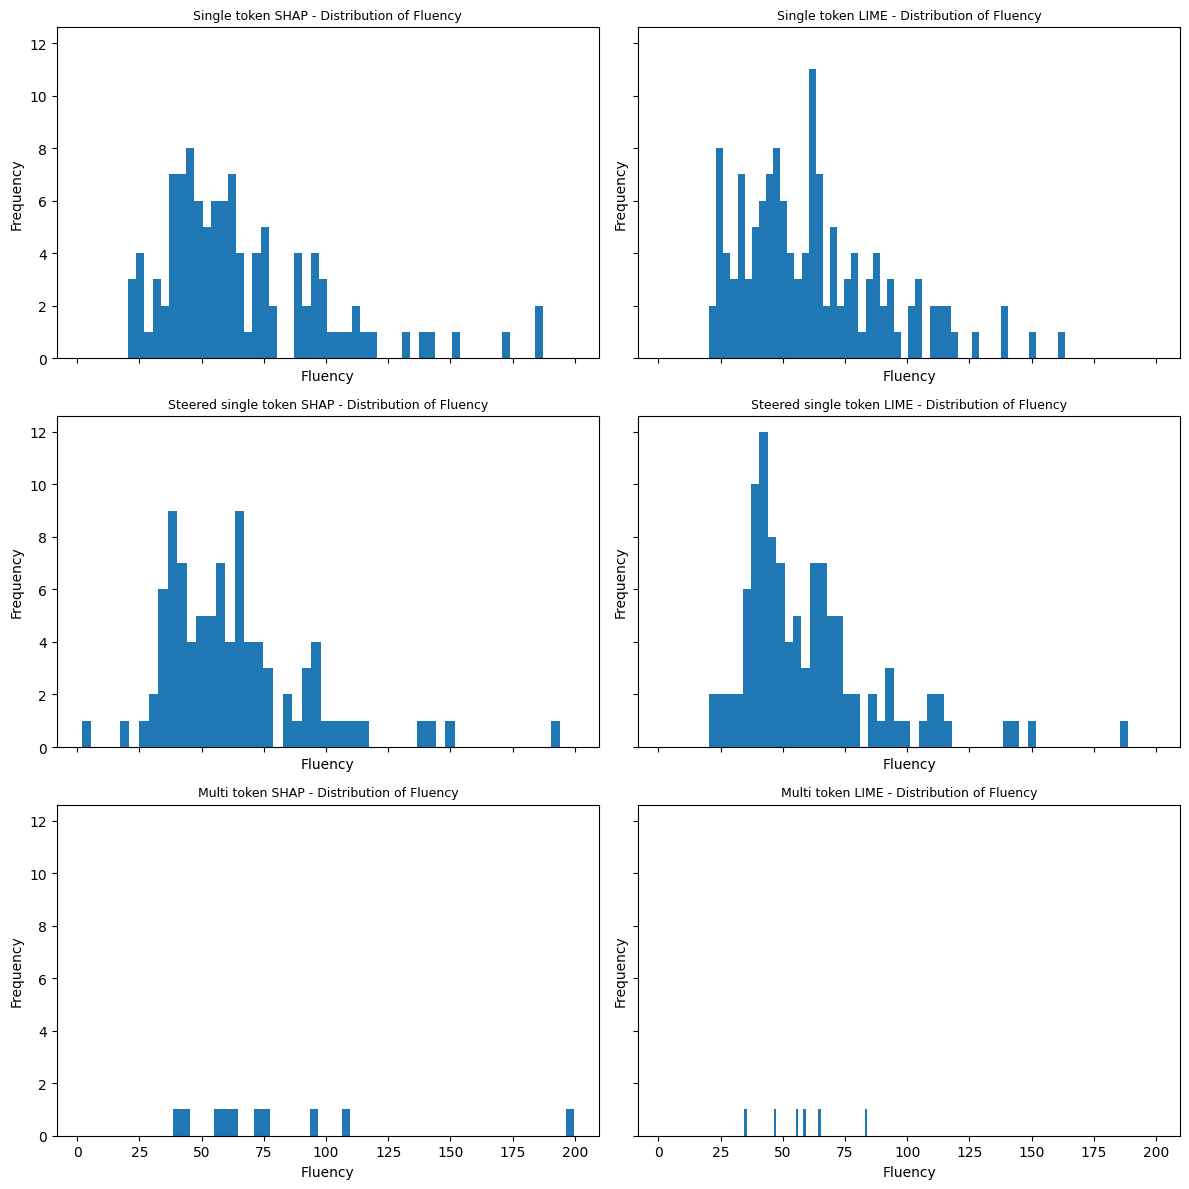

In [34]:
plot_metric_histograms("perplexity", "Fluency")

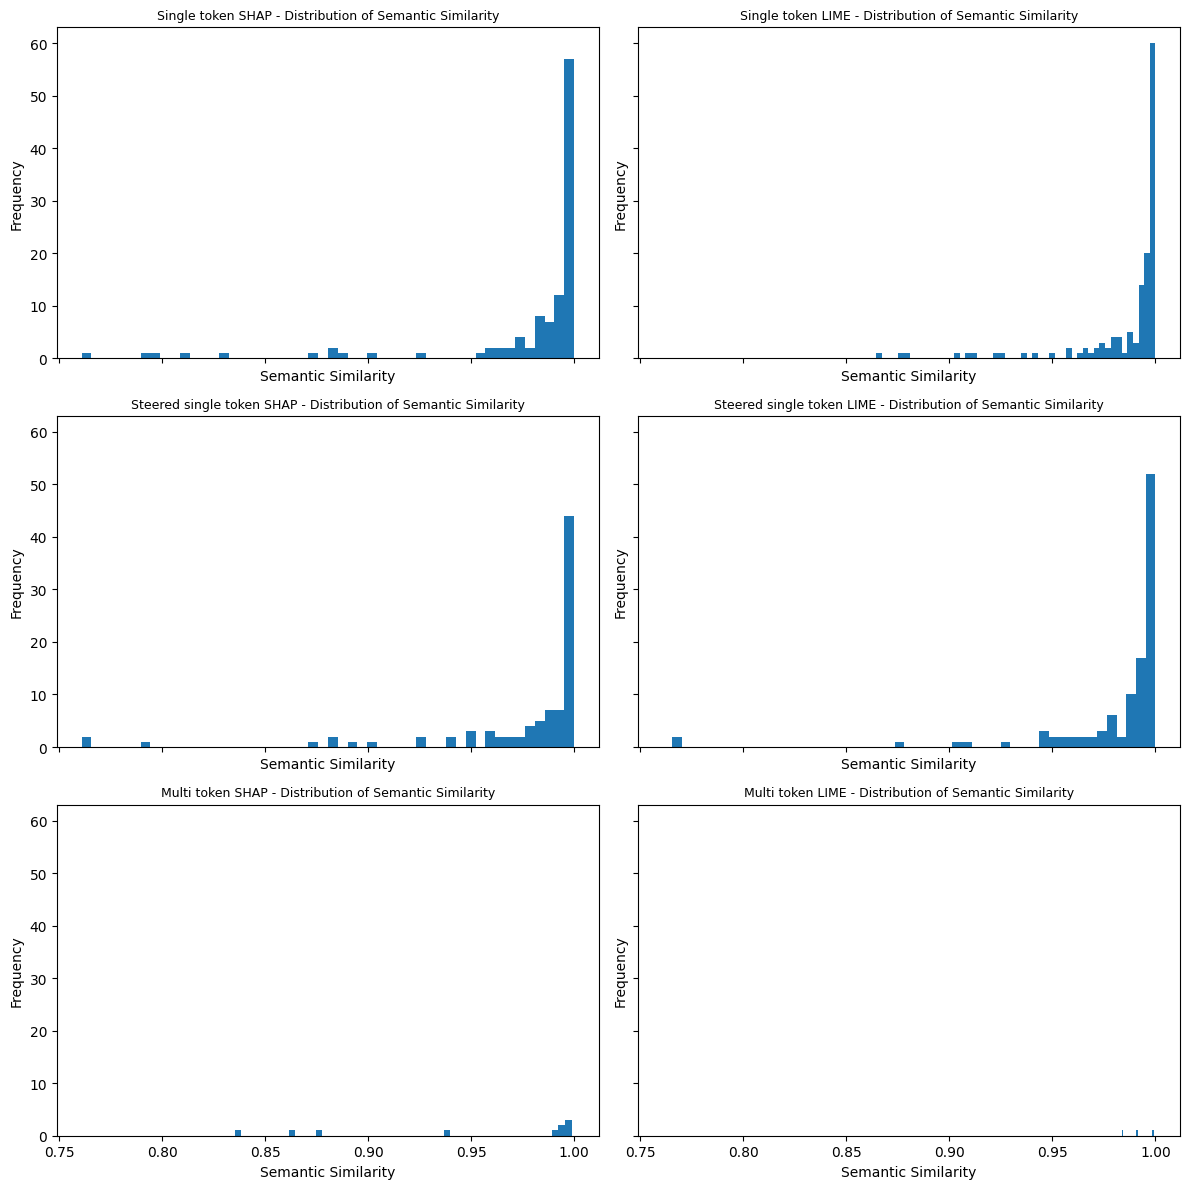

In [35]:
plot_metric_histograms("semantic_similarity", "Semantic Similarity")